# Introduction to Business Analytics Assignment
# Part B (Share Price Analysis)
## gxnj57 (001110537)


In [2]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# All 4 datasets are being imported

Lufthansa_df=pd.read_csv("0H4A Historical Data.csv")
BritAir_df=pd.read_csv("IAGl Historical Data.csv")
EazyJet_df=pd.read_csv("EZJ Historical Data.csv")
Jet2_df=pd.read_csv("JET2 Historical Data.csv")


In [5]:
BritAir_df

,Date,Price,Open,High,Low,Vol.,Change %
0,09/01/2023,151.15,162.55,163.53,150.70,NaN,-6.77%
1,08/01/2023,162.12,171.00,172.90,157.50,NaN,-5.13%
2,07/01/2023,170.88,162.65,171.85,149.40,NaN,5.55%
3,06/01/2023,161.90,154.50,166.90,153.20,NaN,4.96%
4,05/01/2023,154.25,153.05,162.20,144.95,NaN,1.50%
...,...,...,...,...,...,...,...
112,05/01/2014,393.40,407.50,414.50,350.50,16.19M,-2.62%
113,04/01/2014,404.00,418.20,447.00,370.10,18.93M,-3.12%
114,03/01/2014,417.00,433.00,452.90,408.80,13.06M,-4.73%
115,02/01/2014,437.70,419.40,457.10,403.00,13.40M,5.27%


# Question 1

 Import and combine all of these data into a single pandas DataFrame with columns for the company identifier, the date, and the price of the stock on that day (‘Price’ column in the original dataset). 

In [7]:
# Before combining the datasets, I clean each dataset individually for any missing/null values and duplicates 


# Cleaning each dataset by defining a function 'data_clean' 
def data_clean(df, company):
    # Assuming that the CSV files have columns like 'Date' and 'Price' for share prices
    df['Date'] = pd.to_datetime(df['Date'])
    df['Company'] = company
    
    # Remove commas from 'Price' column and as .mean() will not accept string values
    
    df['Price'] = pd.to_numeric(df['Price'].replace(',', '', regex=True), errors='coerce')
    
    # Handling missing values by filling them up with the mean of that column
    
    df['Price'].fillna(df['Price'].mean(), inplace=True)
    
    # Add additional cleaning steps if needed

# Apply cleaning to each dataset by passing each set through the data_clean function
# This function helps in code reusability as it can be used even if new airlines share prices need to be incorporated in the analysis.

data_clean(BritAir_df, 'British Airways')
data_clean(EazyJet_df, 'EasyJet')
data_clean(Jet2_df, 'Jet2')
data_clean(Lufthansa_df, 'Lufthansa')

# Combining all datasets into a single DataFrame
result_df = pd.concat([BritAir_df[['Date', 'Company', 'Price']],
                     EazyJet_df[['Date', 'Company', 'Price']],
                     Jet2_df[['Date', 'Company', 'Price']],
                     Lufthansa_df[['Date', 'Company', 'Price']]],
                    ignore_index=True)

# Display the combined and cleaned DataFrame
print(result_df)


          Date          Company   Price
0   2023-09-01  British Airways  151.15
1   2023-08-01  British Airways  162.12
2   2023-07-01  British Airways  170.88
3   2023-06-01  British Airways  161.90
4   2023-05-01  British Airways  154.25
..         ...              ...     ...
444 2015-09-01        Lufthansa   12.43
445 2015-08-01        Lufthansa   11.03
446 2015-07-01        Lufthansa   12.35
447 2015-06-01        Lufthansa   11.56
448 2015-05-01        Lufthansa   12.98

[449 rows x 3 columns]


In [52]:
#Saving the combined dataset to check for my reference

result_df.to_csv('Downloads/Combined_Dataset.csv', index=False)


In [8]:
#To check if any values are still missing 
missing_values = result_df.isnull().sum()
print(missing_values)

Date       0
Company    0
Price      0
dtype: int64


# Question 2

Make a time series plot of the raw data with a separate line for each company.

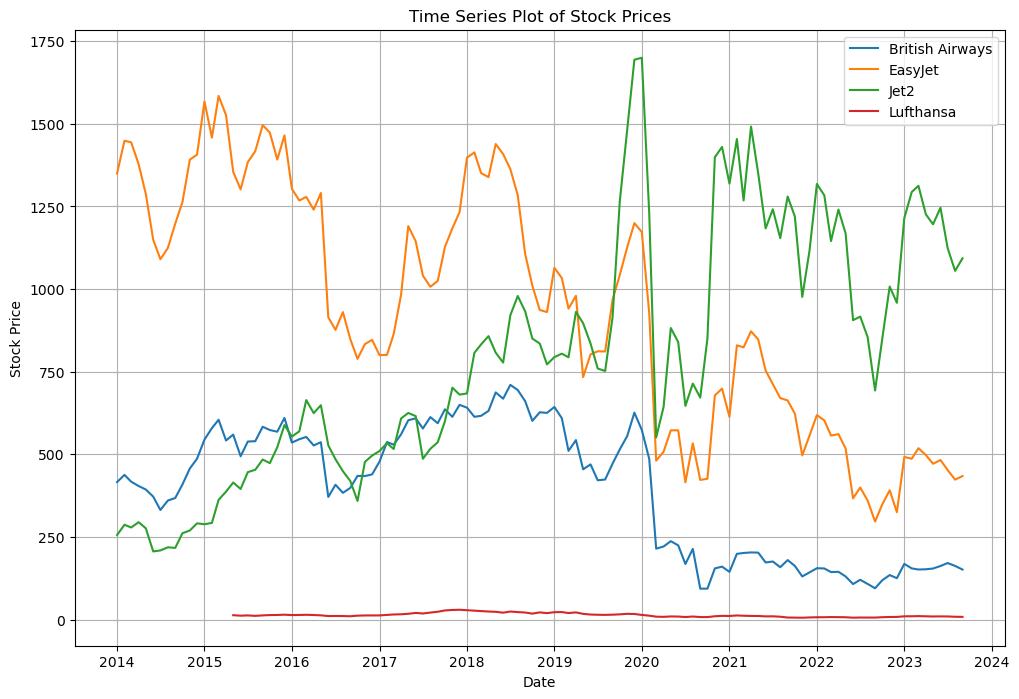

In [11]:

# Converting the 'Date' column to datetime format
result_df['Date'] = pd.to_datetime(result_df['Date'])

# Creating a time series plot with a separate line for each company by using a for loop for reusability
plt.figure(figsize=(12, 8))

for company in result_df['Company'].unique():
    company_data = result_df[result_df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Price'], label=company)

# Customizing the plot 
plt.title('Time Series Plot of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


From the plot we can see that some data is missing for Lufthansa in the dates ranging from 2014-2015(mid), i.e. there is no trend line as seen from the plot above (red line). On checking the excel sheet and from the graph, we can now confirm that data is missing for Lufthansa Airlines for the dates 'Jan 2014-May 2015'.

In order to make a time series plot where all airlines have data for that range of dates, common dates where data is available for all four companies, spanning from May 2015 to September 2023 need to be selected.

# Question 3

This plot shows that some data is missing for one of the airlines. Make a selection of the dataset so that all airlines have the same data and make a time series plot of this new dataset.

In [12]:
#For this, first we need to filter out the common/overlapping dates for each airlines.

# Converting the 'Date' column to datetime
result_df['Date'] = pd.to_datetime(result_df['Date'], format='%d-%m-%Y')

# Creating a dictionary with unique dates for each company
unique_dates_per_company = {company: set(group['Date']) for company, group in result_df.groupby('Company')}

# Finding the intersection of all unique date sets to get common dates
common_dates = set.intersection(*unique_dates_per_company.values())

# Filtering out the dataset to only include rows where the date is in the common_dates set
filtered_df = result_df[result_df['Date'].isin(common_dates)]

# Sorting the DataFrame by date
filtered_df.sort_values(by='Date', inplace=True)



C:\Users\syeda\AppData\Local\Temp\ipykernel_25444\1666225071.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(by='Date', inplace=True)


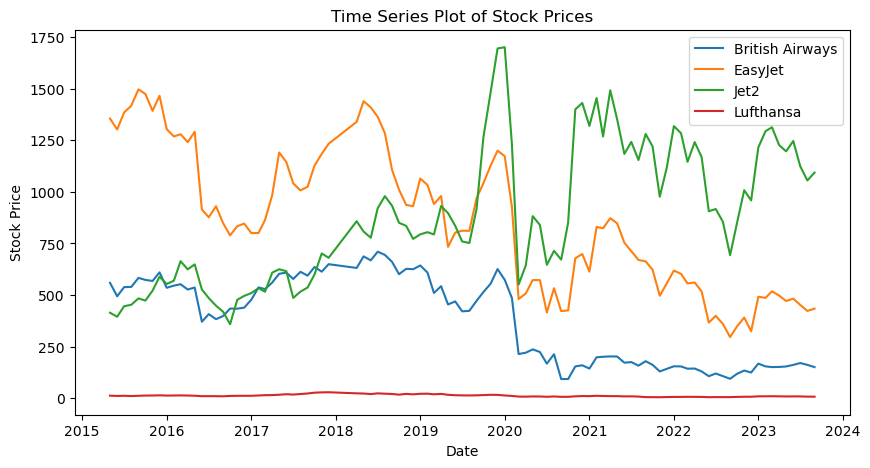

In [14]:
# Pivot the data for plotting
pivot_df = filtered_df.pivot(index='Date', columns='Company', values='Price')

# Plot the data
plt.figure(figsize=(10, 5))
#for loop used to plot graph for all 4 airlines
for company in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[company], label=company)

# Add title and labels
plt.title('Time Series Plot of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')

# Add legend
plt.legend()

# Show plot
plt.show()

# Question 4

To compare the relative performance of shares it is common practice to look at the proportional change over a period of time, by reporting the share price variation as a proportion of its value at the start of the time period. At the start of the 
time period all shares will have a value of 100% and go up and down from there. An example of this is shown from the web site chartoasis which compares the relative share prices of four car manufacturers. Produce a similar chart for the airline data –
you do not need to use the same time period or labelling style.


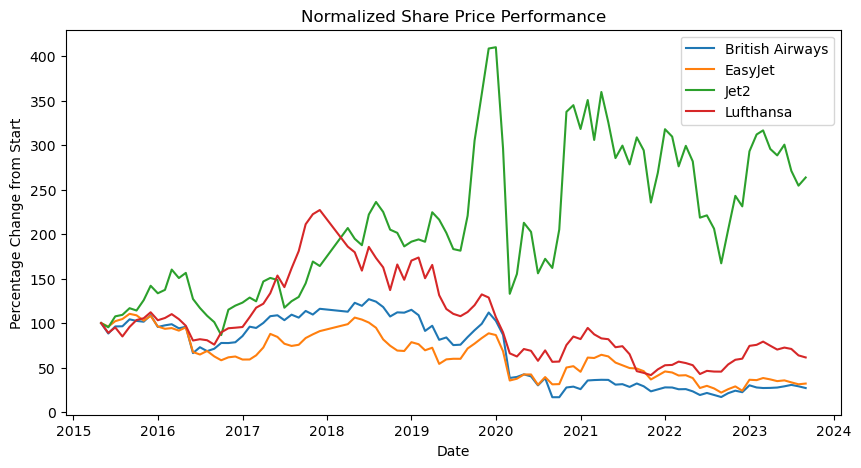

In [16]:
# Pivoting the DataFrame for easier calculations
pivot_df = filtered_df.pivot(index='Date', columns='Company', values='Price')

# In order to normalize the prices: I divide by the price on the first date and then multiply by 100
normalized_df = pivot_df.divide(pivot_df.iloc[0]).multiply(100)

# Plotting the normalized data
plt.figure(figsize=(10, 5))
for company in normalized_df.columns:
    plt.plot(normalized_df.index, normalized_df[company], label=company)

plt.title('Normalized Share Price Performance')
plt.xlabel('Date')
plt.ylabel('Percentage Change from Start')
plt.legend()
plt.show()
